 # **Potential Global user Prediction**

---
The Dataset has the following features

1. Name - Game name
2. Platform - Running platform
3. year of release
4. Genre - Game Genre
5. Publisher
6. Critic_score - Aggregate score compiled by Metacritic staff
7. Criticcount - The number of critics used in coming up with the Critic Score
8. User_score - Score by Metacritic’s subscribers
9. Usercount - Number of users who gave the user score
10. Developer - Party responsible for creating the game
11. Rating - The ESRB ratings
12. NA_Sales - Sales in North America (in millions of units)
13. EU_Sales - Sales in the European Union (in millions of units)
14. JP_Sales - Sales in Japan (in millions of units)
15. Global_Sales - Total sales in the world (in millions of units)

**The task is to predict the potential global user of the game based on the data provided by the customer so that they can plan their global launch**









##**Reading the dataset**
Before reading the dataset,all the important libraries are imported

In [1]:
# Import the required packages
import numpy as np 
import pandas as pd  # Dataframe manipulation
import matplotlib.pyplot as plt  # Visualization 
import seaborn as sns   # Visualization 
from sklearn.linear_model import LinearRegression  # for Linear regression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import preprocessing   
from sklearn.ensemble import RandomForestRegressor   # RandomForestRegressor

In [2]:
#Reading the Train.csv dataset
train_df=pd.read_csv('/content/Train.csv')
# After reading the dataset, let’s check its top 5 rows using head() method to just see how the data looks.
train_df.head(5) 

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,Global_Sales
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,76.0,51.0,8,322.0,Nintendo,E,82.53
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,NaN,NaN,NaN,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,82.0,73.0,8.3,709.0,Nintendo,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,80.0,73.0,8,192.0,Nintendo,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,NaN,NaN,NaN,NaN,NaN,NaN,31.37


In [3]:
# Checking the shape of the dataset
train_df.shape 

(14576, 15)

In [4]:
# Finding out the number of non-null values and the datatype of each and every attribute of Train.csv
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14576 entries, 0 to 14575
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             14574 non-null  object 
 1   Platform         14576 non-null  object 
 2   Year_of_Release  14344 non-null  float64
 3   Genre            14574 non-null  object 
 4   Publisher        14527 non-null  object 
 5   NA_Sales         14576 non-null  float64
 6   EU_Sales         14576 non-null  float64
 7   JP_Sales         14576 non-null  float64
 8   Critic_Score     7217 non-null   float64
 9   Critic_Count     7217 non-null   float64
 10  User_Score       8760 non-null   object 
 11  User_Count       6796 non-null   float64
 12  Developer        8829 non-null   object 
 13  Rating           8704 non-null   object 
 14  Global_Sales     14576 non-null  float64
dtypes: float64(8), object(7)
memory usage: 1.7+ MB


In [5]:
train_df.describe(include='all')   #description of the columns

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,Global_Sales
count,14574,14576,14344.000000,14574,14527,14576.000000,14576.000000,14576.000000,7217.000000,7217.000000,8760,6796.000000,8829,8704,14576.000000
unique,10327,31,NaN,12,552,NaN,NaN,NaN,NaN,NaN,96,NaN,1577,8,NaN
top,Need for Speed: Most Wanted,PS2,NaN,Action,Electronic Arts,NaN,NaN,NaN,NaN,NaN,tbd,NaN,Ubisoft,E,NaN
freq,11,1935,NaN,2974,1267,NaN,NaN,NaN,NaN,NaN,1964,NaN,171,3460,NaN
mean,NaN,NaN,2006.437117,NaN,NaN,0.295577,0.163957,0.085659,69.676043,27.312041,NaN,172.513096,NaN,NaN,0.598972
std,NaN,NaN,5.955664,NaN,NaN,0.866491,0.536354,0.329646,13.773391,19.464196,NaN,576.609716,NaN,NaN,1.647699
min,NaN,NaN,1980.000000,NaN,NaN,0.000000,0.000000,0.000000,13.000000,3.000000,NaN,4.000000,NaN,NaN,0.010000
25%,NaN,NaN,2003.000000,NaN,NaN,0.000000,0.000000,0.000000,61.000000,12.000000,NaN,11.000000,NaN,NaN,0.050000
50%,NaN,NaN,2007.000000,NaN,NaN,0.100000,0.030000,0.000000,71.000000,22.000000,NaN,27.000000,NaN,NaN,0.220000
75%,NaN,NaN,2010.000000,NaN,NaN,0.280000,0.130000,0.030000,80.000000,38.000000,NaN,89.000000,NaN,NaN,0.550000


In [6]:
# checking for number of missing values in Train.csv
train_df.isnull().sum()

Name                  2
Platform              0
Year_of_Release     232
Genre                 2
Publisher            49
NA_Sales              0
EU_Sales              0
JP_Sales              0
Critic_Score       7359
Critic_Count       7359
User_Score         5816
User_Count         7780
Developer          5747
Rating             5872
Global_Sales          0
dtype: int64

In [7]:
#Reading the Train.csv dataset
test_df=pd.read_csv('/content/Test.csv')
# After reading the dataset, let’s check its top 5 rows using head() method to just see how the data looks.
test_df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Nicktoons: MLB,X360,2011.0,Sports,Take-Two Interactive,0.12,0.00,0.0,NaN,NaN,7.6,7.0,High Voltage Software,E
1,Shonen Jump's One Piece: Grand Battle,PS2,2005.0,Fighting,Atari,0.07,0.05,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2,Learn Math,DS,2009.0,Puzzle,DreamCatcher Interactive,0.12,0.00,0.0,NaN,NaN,tbd,NaN,Dreamcatcher,E
3,Nitrobike,Wii,2008.0,Racing,Ubisoft,0.11,0.01,0.0,49.0,22.0,7.1,7.0,Left Field Productions,E10+
4,Cruise Ship Vacation Games,Wii,2009.0,Puzzle,Avanquest,0.12,0.00,0.0,NaN,NaN,tbd,NaN,Activision,E


In [8]:
# Checking the shape of the dataset
test_df.shape

(2143, 14)

In [9]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2143 entries, 0 to 2142
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             2143 non-null   object 
 1   Platform         2143 non-null   object 
 2   Year_of_Release  2106 non-null   float64
 3   Genre            2143 non-null   object 
 4   Publisher        2138 non-null   object 
 5   NA_Sales         2143 non-null   float64
 6   EU_Sales         2143 non-null   float64
 7   JP_Sales         2143 non-null   float64
 8   Critic_Score     920 non-null    float64
 9   Critic_Count     920 non-null    float64
 10  User_Score       1255 non-null   object 
 11  User_Count       794 non-null    float64
 12  Developer        1267 non-null   object 
 13  Rating           1246 non-null   object 
dtypes: float64(7), object(7)
memory usage: 234.5+ KB


In [10]:
# checking for number of missing values in Test.csv
test_df.isnull().sum()


Name                  0
Platform              0
Year_of_Release      37
Genre                 0
Publisher             5
NA_Sales              0
EU_Sales              0
JP_Sales              0
Critic_Score       1223
Critic_Count       1223
User_Score          888
User_Count         1349
Developer           876
Rating              897
dtype: int64

### **Handling Missing values for Train.csv**
 Let us replace the missing values in every attribute



In [11]:
train_df.isnull().sum()

Name                  2
Platform              0
Year_of_Release     232
Genre                 2
Publisher            49
NA_Sales              0
EU_Sales              0
JP_Sales              0
Critic_Score       7359
Critic_Count       7359
User_Score         5816
User_Count         7780
Developer          5747
Rating             5872
Global_Sales          0
dtype: int64

In [12]:
train_df.isna().mean().round(4) * 100

Name                0.01
Platform            0.00
Year_of_Release     1.59
Genre               0.01
Publisher           0.34
NA_Sales            0.00
EU_Sales            0.00
JP_Sales            0.00
Critic_Score       50.49
Critic_Count       50.49
User_Score         39.90
User_Count         53.38
Developer          39.43
Rating             40.29
Global_Sales        0.00
dtype: float64

In [13]:
# The atrribute 'Year_of_Release' has  1.59 percent of null values, which is replaced with median value
median_value=train_df['Year_of_Release'].median()
train_df['Year_of_Release'].fillna(value=median_value,inplace=True)

In [14]:
train_df.isnull().sum()

Name                  2
Platform              0
Year_of_Release       0
Genre                 2
Publisher            49
NA_Sales              0
EU_Sales              0
JP_Sales              0
Critic_Score       7359
Critic_Count       7359
User_Score         5816
User_Count         7780
Developer          5747
Rating             5872
Global_Sales          0
dtype: int64

In [15]:
# Similarly, the attribute 'Critic_Score' has around  50.49 percent of missing value which is replaced with mean 
mean_value=train_df['Critic_Score'].mean()
train_df['Critic_Score'].fillna(value=mean_value,inplace=True)

In [16]:
# Similarly, the attribute 'Critic_Count' has around  50.49 percent of missing value which is replaced with mean
mean_value=train_df['Critic_Count'].mean()
train_df['Critic_Count'].fillna(value=mean_value,inplace=True)

In [17]:
#  The attribute 'User_Score' is converted from object to numerical datatype for further predictions
train_df['User_Score'] = pd.to_numeric(train_df['User_Score'],errors = 'coerce')

In [18]:
mean_value=train_df['User_Count'].mean()
train_df['User_Count'].fillna(value=mean_value,inplace=True)

In [19]:
mean_value=train_df['User_Score'].mean()
train_df['User_Score'].fillna(value=mean_value,inplace=True)

In [20]:
train_df.isnull().sum()

Name                  2
Platform              0
Year_of_Release       0
Genre                 2
Publisher            49
NA_Sales              0
EU_Sales              0
JP_Sales              0
Critic_Score          0
Critic_Count          0
User_Score            0
User_Count            0
Developer          5747
Rating             5872
Global_Sales          0
dtype: int64

In [21]:
#Replacing the missing values of categorical columns with mode 
train_df=train_df.fillna(train_df.mode().iloc[0])         

In [22]:
train_df.isnull().sum()    # Missing values replaced

Name               0
Platform           0
Year_of_Release    0
Genre              0
Publisher          0
NA_Sales           0
EU_Sales           0
JP_Sales           0
Critic_Score       0
Critic_Count       0
User_Score         0
User_Count         0
Developer          0
Rating             0
Global_Sales       0
dtype: int64

## Handling Missing values  - Test data


In [23]:
test_df.isnull().sum()

Name                  0
Platform              0
Year_of_Release      37
Genre                 0
Publisher             5
NA_Sales              0
EU_Sales              0
JP_Sales              0
Critic_Score       1223
Critic_Count       1223
User_Score          888
User_Count         1349
Developer           876
Rating              897
dtype: int64

In [24]:
test_df.isna().mean().round(4) * 100

Name                0.00
Platform            0.00
Year_of_Release     1.73
Genre               0.00
Publisher           0.23
NA_Sales            0.00
EU_Sales            0.00
JP_Sales            0.00
Critic_Score       57.07
Critic_Count       57.07
User_Score         41.44
User_Count         62.95
Developer          40.88
Rating             41.86
dtype: float64

In [25]:
# The atrribute 'Year_of_Release' has  1.73 percent of null values, which is replaced with median value
median_value=test_df['Year_of_Release'].median()
test_df['Year_of_Release'].fillna(value=median_value,inplace=True)

In [26]:
# The atrribute 'Critic_Score' has  57.07  percent of null values, which is replaced with mean value
mean_value=test_df['Critic_Score'].mean()
test_df['Critic_Score'].fillna(value=mean_value,inplace=True)

In [27]:
# The atrribute 'Critic_Count' has  57.07  percent of null values, which is replaced with mean value
mean_value=test_df['Critic_Count'].mean()
test_df['Critic_Count'].fillna(value=mean_value,inplace=True)

In [28]:
test_df['User_Score'] = pd.to_numeric(test_df['User_Score'],errors = 'coerce')

In [29]:
test_df.isnull().sum()

Name                  0
Platform              0
Year_of_Release       0
Genre                 0
Publisher             5
NA_Sales              0
EU_Sales              0
JP_Sales              0
Critic_Score          0
Critic_Count          0
User_Score         1349
User_Count         1349
Developer           876
Rating              897
dtype: int64

In [30]:
# The atrribute 'User_Count' has 62.95  percent of null values, which is replaced with mean value
mean_value=test_df['User_Count'].mean()
test_df['User_Count'].fillna(value=mean_value,inplace=True)

In [31]:
# The atrribute 'User_Score' has 41.44 percent of null values, which is replaced with mean value
mean_value=test_df['User_Score'].mean()
test_df['User_Score'].fillna(value=mean_value,inplace=True)

In [32]:
#replacing all the categorical values
test_df=test_df.fillna(test_df.mode().iloc[0])       

In [33]:
train_df.dtypes

Name                object
Platform            object
Year_of_Release    float64
Genre               object
Publisher           object
NA_Sales           float64
EU_Sales           float64
JP_Sales           float64
Critic_Score       float64
Critic_Count       float64
User_Score         float64
User_Count         float64
Developer           object
Rating              object
Global_Sales       float64
dtype: object

## **Data Visualization**

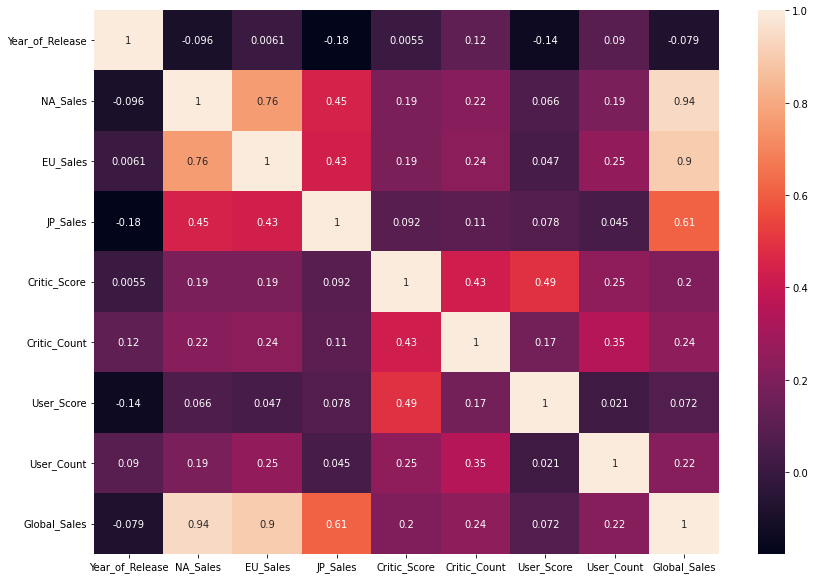

In [34]:
plt.figure(figsize = (14,10))

sns.heatmap(train_df.corr(),annot=True)
plt.show()

**Outliers detection**



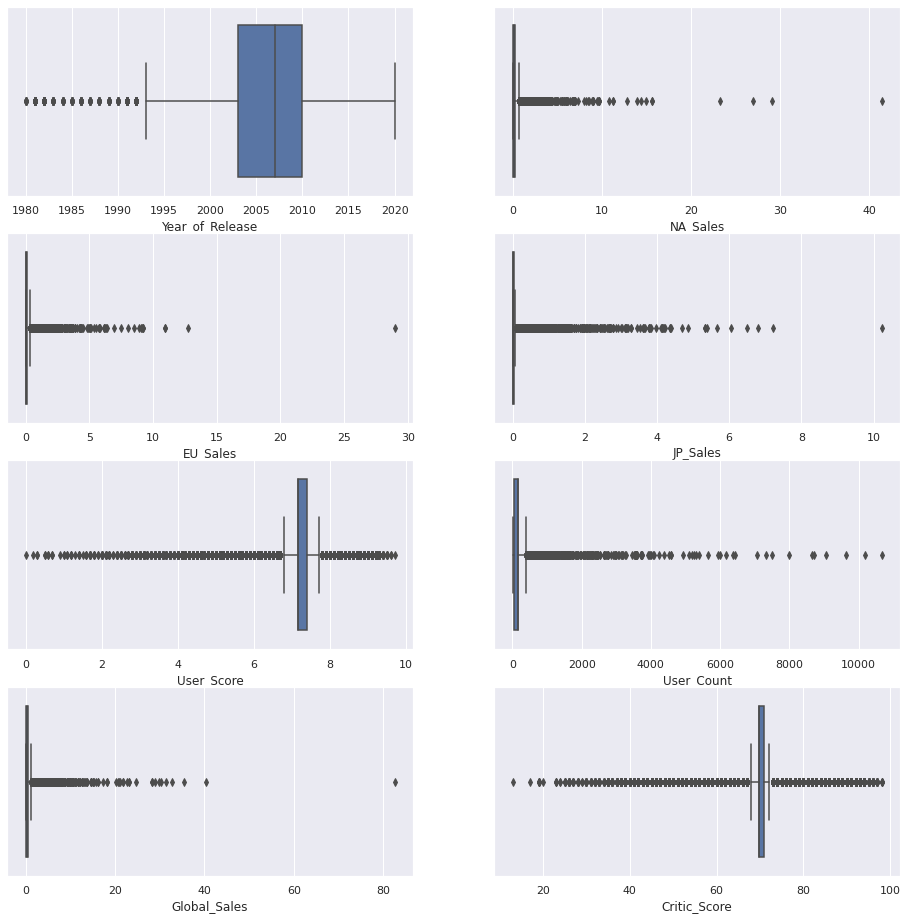

In [35]:
sns.set_theme(style="darkgrid")
fig, ((ax1, ax2), (ax3, ax4),(ax5,ax6),(ax7,ax8))= plt.subplots(nrows=4, ncols=2, figsize=(16,16))
sns.boxplot(data=train_df,x="Year_of_Release",ax=ax1)
sns.boxplot(data=train_df,x="NA_Sales",ax=ax2)
sns.boxplot(data=train_df,x="EU_Sales",ax=ax3)
sns.boxplot(data=train_df,x="JP_Sales",ax=ax4)
sns.boxplot(data=train_df,x="User_Score",ax=ax5)
sns.boxplot(data=train_df,x="User_Count",ax=ax6)
sns.boxplot(data=train_df,x="Global_Sales",ax=ax7)
sns.boxplot(data=train_df,x="Critic_Score",ax=ax8)


From the above Boxplots it is clearly evident that there are lot of outliers in the Train.csv dataset

**Top Grossing Videogame Genre**

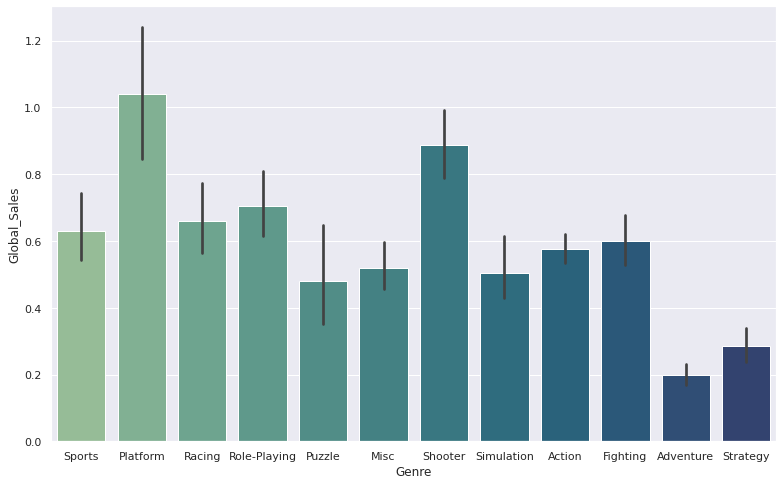

In [36]:
sns.set_style("darkgrid") #setting the style
sns.set_context("notebook")
plt.figure(figsize=(13,8))
sns.barplot(x='Genre',y='Global_Sales',data=train_df,palette='crest')

From the above plot it is evident that Platform kind of videogames has the highest Global sales compared to other Genre

**Most sold video game**

In [37]:
most_sold=train_df.sort_values('Global_Sales',ascending=False)[:5]
#Sorts the views column in Descending order,the top 5 fields are taken stored in most_sold dataframe
most_sold[['Publisher','Genre','Global_Sales','Name']]
# As we can see that the video "Nintendo" Publisher  has the highest 

,Publisher,Genre,Global_Sales,Name
0,Nintendo,Sports,82.53,Wii Sports
1,Nintendo,Platform,40.24,Super Mario Bros.
2,Nintendo,Racing,35.52,Mario Kart Wii
3,Nintendo,Sports,32.77,Wii Sports Resort
4,Nintendo,Role-Playing,31.37,Pokemon Red/Pokemon Blue


**Visualizing Most sold video game**

Text(0.5, 1.0, 'Most sold video game')

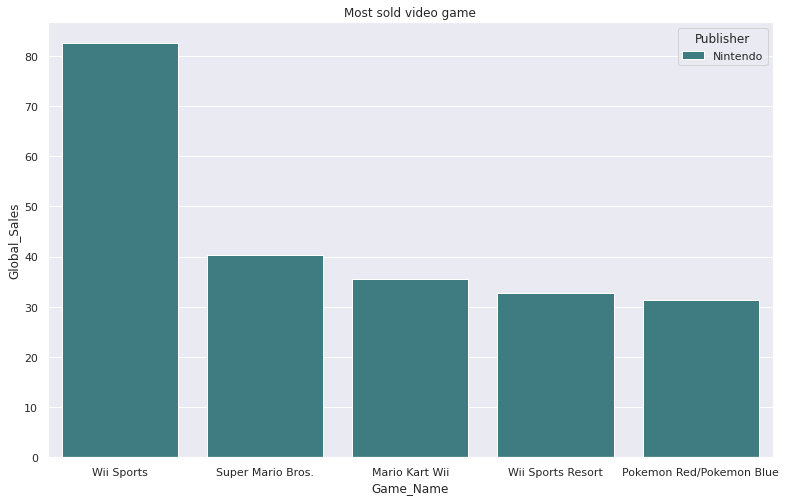

In [38]:
sns.set_style("darkgrid") #setting the style
sns.set_context("notebook")
plt.figure(figsize=(13,8))
sns.barplot(x='Name',y="Global_Sales",hue="Publisher",data=most_sold,palette="crest")  # using seaborn Library 
plt.xlabel("Game_Name")
plt.ylabel("Global_Sales")
plt.title("Most sold video game")

From the above plot, **Wii sports** game is top sold game of all year which was published by Nintendo video game company 

As, Machine learning models require all input and output variables to be in numeric format.Hence the categorical values are converted to numerical datatype.By performing Label Encoding we can convert categorical to numerical datatypes

In [39]:
# Label Encoding on both train and test csv files
label_encoder=preprocessing.LabelEncoder()
train_df['Rating']= label_encoder.fit_transform(train_df['Rating'])

In [40]:
label_encoder=preprocessing.LabelEncoder()
train_df['Developer']= label_encoder.fit_transform(train_df['Developer'])

In [41]:
train_df['Genre'].value_counts()

Action          2976
Sports          2078
Misc            1503
Role-Playing    1300
Shooter         1171
Adventure       1127
Racing          1084
Platform         786
Simulation       753
Fighting         728
Strategy         582
Puzzle           488
Name: Genre, dtype: int64

In [42]:
label_encoder=preprocessing.LabelEncoder()
train_df['Genre']= label_encoder.fit_transform(train_df['Genre'])

In [43]:
label_encoder=preprocessing.LabelEncoder()
test_df['Rating']= label_encoder.fit_transform(test_df['Rating'])

In [44]:
label_encoder=preprocessing.LabelEncoder()
test_df['Genre']= label_encoder.fit_transform(test_df['Genre'])

In [45]:
label_encoder=preprocessing.LabelEncoder()
test_df['Developer']= label_encoder.fit_transform(test_df['Developer'])

In [46]:
#Finding correlation among the variables
train_df.corr()

,Year_of_Release,Genre,NA_Sales,EU_Sales,JP_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,Global_Sales
Year_of_Release,1.000000,-0.122394,-0.095565,0.006070,-0.176927,0.005473,0.116242,-0.137240,0.090086,-0.141434,0.134015,-0.078720
Genre,-0.122394,1.000000,0.020473,0.020495,0.033758,0.104604,-0.009090,0.007396,0.004222,-0.087310,-0.059270,0.025706
NA_Sales,-0.095565,0.020473,1.000000,0.763139,0.446972,0.186719,0.223509,0.066391,0.190833,-0.029922,0.037622,0.940451
EU_Sales,0.006070,0.020495,0.763139,1.000000,0.432235,0.194882,0.240464,0.046775,0.252379,-0.036745,0.050919,0.900325
JP_Sales,-0.176927,0.033758,0.446972,0.432235,1.000000,0.091767,0.106054,0.077842,0.044505,0.090470,-0.063575,0.610518
Critic_Score,0.005473,0.104604,0.186719,0.194882,0.091767,1.000000,0.427287,0.492845,0.249138,0.017176,0.042908,0.202397
Critic_Count,0.116242,-0.009090,0.223509,0.240464,0.106054,0.427287,1.000000,0.169882,0.350455,0.025066,0.198769,0.244800
User_Score,-0.137240,0.007396,0.066391,0.046775,0.077842,0.492845,0.169882,1.000000,0.020687,0.010084,0.065963,0.071988
User_Count,0.090086,0.004222,0.190833,0.252379,0.044505,0.249138,0.350455,0.020687,1.000000,-0.011477,0.074260,0.218593
Developer,-0.141434,-0.087310,-0.029922,-0.036745,0.090470,0.017176,0.025066,0.010084,-0.011477,1.000000,-0.330280,-0.015612


# **Building the model**
In this we will build several regression model on the same dataset and finally we will find which model yields the best score.

1. Linear Regression
2. Random Forest Regressor




### **Defining the input-output features**
After reading the dataset in the above step, we will define the input and features. All the columns except amount will be defined as input features and the amount will be defined as the output feature

In [47]:
#implementing Linear Regression
X = train_df.drop(['Global_Sales','Name','Platform','Publisher'], axis=1)
#Feature selection
# the dependent variable 
y= train_df[['Global_Sales']]

In this step, we will split the input and output features into the training set and test set.

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

**Preprocessing**

In [49]:
from sklearn.preprocessing import StandardScaler
st_x= StandardScaler()    
x_train= st_x.fit_transform(X_train)    
x_test= st_x.transform(X_test)

### **1.Linear Regression**

In [50]:
reg_model = LinearRegression()
reg_model.fit(X_train, y_train)

LinearRegression()

In [51]:
reg_model.score(X_train, y_train),reg_model.score(X_test, y_test)

(0.9954700849353215, 0.9869334714508348)

Here, the training-set accuracy score is **0.995** while the test-set accuracy to be **0.98**.Though the accuracy of this model is very good but we rule out Linear Regression model because the dataset has more outliers and Linear regression model is not robust to the outliers

**Predicting the test data**

With the trained Linear Regression model, we will predict the global sales using the test data.

In [58]:
y = train_df["Global_Sales"]

features = ["Developer","Genre","Year_of_Release",'NA_Sales','EU_Sales', 'JP_Sales', 'Critic_Score', 'Critic_Count', 'User_Score','User_Count','Rating']
X = pd.get_dummies(train_df[features])
X_test = pd.get_dummies(test_df[features])

reg_model.fit(X, y)
predictions = reg_model.predict(X_test)

output = pd.DataFrame({'name': test_df.Name, 'global sales': predictions})
output.to_csv('LR_submission.csv', index=False)
print("File submission was successfully saved!")

File submission was successfully saved!


 ### **2.RandomForestRegressor**


In [53]:
# create regressor object
regressor = RandomForestRegressor(n_estimators = 500, random_state = 0)
# fit the regressor with x and y data

In [54]:
regressor.fit(X_train, y_train)
#Train data
regressor.score(X_train,y_train)*100

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


98.57915470184734

Here, the training-set accuracy score is 98.5 while the test-set accuracy to be 99.42 . It is clear that, in this dataset random forest regressor produces the highest accuracy score.


RandomForest Regressor is chosen as the final model as it Robust to outliers and it do not require any feature scaling techniques on data unlike Linear regression model



**Predicting the test data**

With the trained RandomForest Regressor model, we will predict the global sales using the test data.

In [57]:
y = train_df["Global_Sales"]

features = ["Developer","Genre","Year_of_Release",'NA_Sales','EU_Sales', 'JP_Sales', 'Critic_Score', 'Critic_Count', 'User_Score','User_Count','Rating']
X = pd.get_dummies(train_df[features])
X_test = pd.get_dummies(test_df[features])

model = RandomForestRegressor(n_estimators=250, max_depth=7, random_state=1)
model.fit(X, y)
predictions = model.predict(X_test)

output = pd.DataFrame({'name': test_df.Name, 'global sales': predictions})
output.to_csv('RGR_submission.csv', index=False)
print("File  was successfully saved!")

File  was successfully saved!
